In [297]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("D:/dataset/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [298]:
df.shape

(150, 6)

In [299]:
df.size

900

In [300]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [301]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [302]:
fig= px.line(df['PetalLengthCm'],color=df['Species'])
fig.show()

In [303]:
fig =px.bar(df,x='SepalWidthCm',y='PetalLengthCm',color='Species') #,animation_frame='species')
fig.show()

In [304]:
fig=px.histogram(df['SepalWidthCm'],color=df['Species'])
fig.show()

In [305]:
fig=px.scatter(x=df['Species'],y=df['SepalWidthCm'],color=df['Species'],size=df['PetalLengthCm'])
fig.show()

In [306]:
fig=px.pie(values=df['Species'].value_counts(),names=df['Species'].value_counts().index)
fig.show()

In [307]:
fig=px.box(df.drop(['Species'],axis=1),color=df['Species'])
fig.show()

In [308]:
fig=px.violin(df.drop(['Species'],axis=1))
fig.show()

In [309]:
df1=sns.load_dataset('tips')
df1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [310]:
fig=px.scatter(df1,x = 'tip',y='total_bill',color=df1['sex'],size=df1['size'],animation_frame=df1['size'])
fig.show()

In [311]:
fig=px.histogram(df1,x='total_bill',y='tip',histfunc='sum',color='smoker',)
fig.show()

In [312]:
fig=px.scatter_matrix(df,dimensions=['SepalWidthCm','SepalLengthCm','PetalWidthCm','PetalLengthCm'],color='Species')
fig.show()

In [313]:
fig=px.scatter(df,x='SepalWidthCm',y='SepalLengthCm',color='Species',marginal_x='box',marginal_y='histogram',trendline='ols',)
fig.show()

In [314]:
fig=px.scatter(df,x='SepalWidthCm',y='SepalLengthCm',color='Species',marginal_x='box',marginal_y='histogram',trendline='ols')
fig.show()

In [315]:
fig=px.imshow(df.drop(['Species'],axis=1),text_auto=True, aspect="auto")
fig.show()

In [316]:
# converting to inputs and outputs
x=df.iloc[:,:-1].values # input data
y=df.iloc[:,-1].values # output data
x

array([[1.00e+00, 5.10e+00, 3.50e+00, 1.40e+00, 2.00e-01],
       [2.00e+00, 4.90e+00, 3.00e+00, 1.40e+00, 2.00e-01],
       [3.00e+00, 4.70e+00, 3.20e+00, 1.30e+00, 2.00e-01],
       [4.00e+00, 4.60e+00, 3.10e+00, 1.50e+00, 2.00e-01],
       [5.00e+00, 5.00e+00, 3.60e+00, 1.40e+00, 2.00e-01],
       [6.00e+00, 5.40e+00, 3.90e+00, 1.70e+00, 4.00e-01],
       [7.00e+00, 4.60e+00, 3.40e+00, 1.40e+00, 3.00e-01],
       [8.00e+00, 5.00e+00, 3.40e+00, 1.50e+00, 2.00e-01],
       [9.00e+00, 4.40e+00, 2.90e+00, 1.40e+00, 2.00e-01],
       [1.00e+01, 4.90e+00, 3.10e+00, 1.50e+00, 1.00e-01],
       [1.10e+01, 5.40e+00, 3.70e+00, 1.50e+00, 2.00e-01],
       [1.20e+01, 4.80e+00, 3.40e+00, 1.60e+00, 2.00e-01],
       [1.30e+01, 4.80e+00, 3.00e+00, 1.40e+00, 1.00e-01],
       [1.40e+01, 4.30e+00, 3.00e+00, 1.10e+00, 1.00e-01],
       [1.50e+01, 5.80e+00, 4.00e+00, 1.20e+00, 2.00e-01],
       [1.60e+01, 5.70e+00, 4.40e+00, 1.50e+00, 4.00e-01],
       [1.70e+01, 5.40e+00, 3.90e+00, 1.30e+00, 4.00e-01

In [317]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30)
x_train

array([[6.00e+01, 5.20e+00, 2.70e+00, 3.90e+00, 1.40e+00],
       [1.26e+02, 7.20e+00, 3.20e+00, 6.00e+00, 1.80e+00],
       [1.20e+02, 6.00e+00, 2.20e+00, 5.00e+00, 1.50e+00],
       [5.60e+01, 5.70e+00, 2.80e+00, 4.50e+00, 1.30e+00],
       [1.15e+02, 5.80e+00, 2.80e+00, 5.10e+00, 2.40e+00],
       [7.90e+01, 6.00e+00, 2.90e+00, 4.50e+00, 1.50e+00],
       [3.60e+01, 5.00e+00, 3.20e+00, 1.20e+00, 2.00e-01],
       [2.80e+01, 5.20e+00, 3.50e+00, 1.50e+00, 2.00e-01],
       [1.23e+02, 7.70e+00, 2.80e+00, 6.70e+00, 2.00e+00],
       [8.30e+01, 5.80e+00, 2.70e+00, 3.90e+00, 1.20e+00],
       [4.60e+01, 4.80e+00, 3.00e+00, 1.40e+00, 3.00e-01],
       [1.17e+02, 6.50e+00, 3.00e+00, 5.50e+00, 1.80e+00],
       [7.50e+01, 6.40e+00, 2.90e+00, 4.30e+00, 1.30e+00],
       [5.20e+01, 6.40e+00, 3.20e+00, 4.50e+00, 1.50e+00],
       [3.10e+01, 4.80e+00, 3.10e+00, 1.60e+00, 2.00e-01],
       [3.80e+01, 4.90e+00, 3.10e+00, 1.50e+00, 1.00e-01],
       [1.06e+02, 7.60e+00, 3.00e+00, 6.60e+00, 2.10e+00

In [318]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_test

array([[-7.60673251e-01, -1.08566939e+00,  1.13411653e+00,
        -1.31465430e+00, -8.45613560e-01],
       [-1.52266597e+00, -6.03659723e-01,  1.60854775e+00,
        -1.37190801e+00, -1.37888337e+00],
       [-3.68131547e-01, -1.08566939e+00, -2.42411761e+00,
        -2.26833757e-01, -3.12343747e-01],
       [-1.26866840e+00, -9.65166971e-01,  1.60854775e+00,
        -1.37190801e+00, -1.11224847e+00],
       [ 1.45603284e+00,  1.20387652e+00,  1.85254095e-01,
         8.60986785e-01,  1.15414824e+00],
       [-9.68489447e-01, -1.20617180e+00,  1.85254095e-01,
        -1.37190801e+00, -1.51220082e+00],
       [ 1.31748871e+00,  4.80862022e-01, -5.26392733e-01,
         6.89225647e-01,  3.54243518e-01],
       [ 7.63312187e-01,  1.56538377e+00,  1.37133214e+00,
         1.26176277e+00,  1.68741805e+00],
       [ 2.44101564e-02,  9.62871687e-01, -5.19615144e-02,
         6.31971934e-01,  6.20878424e-01],
       [-1.45339391e+00, -1.92918630e+00, -5.19615144e-02,
        -1.60092286e+00

In [319]:
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(x_train, y_train)
y_predict = classifier.predict(x_test)
y_predict

array(['Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [320]:
score=accuracy_score(y_test, y_predict)
score

0.9777777777777777

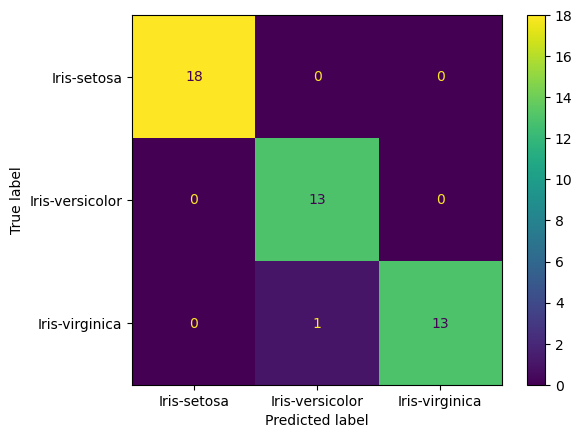

In [321]:
label = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
result = confusion_matrix(y_test, y_predict)
cmd = ConfusionMatrixDisplay(result, display_labels=label)
cmd.plot()